#Destek Vektör Makinaları (SVM)

###SVM Nedir?

Genel olarak, Destek Vektör Makineleri bir sınıflandırma yaklaşımı olarak kabul edilir, ancak hem sınıflandırma hem de regresyon problemlerinde kullanılabilir. Birden çok sürekli ve kategorik değişkeni kolayca işleyebilir. SVM, farklı sınıfları ayırmak için çok boyutlu uzayda bir hiperdüzlem oluşturur. SVM, bir hatayı en aza indirmek için kullanılan yinelemeli bir şekilde en uygun hiper düzlemi oluşturur. SVM'in temel fikri, veri kümesini sınıflara en iyi şekilde bölen bir maksimum marjinal hiperdüzlem (MMH) bulmaktır.

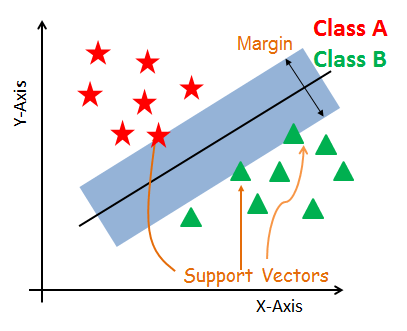

Destek Vektörleri
Destek vektörleri, hiper düzleme en yakın olan veri noktalarıdır. Bu noktalar, kenar boşluklarını hesaplayarak ayırma çizgisini daha iyi tanımlayacaktır. Bu noktalar daha çok sınıflandırıcının yapısıyla ilgilidir.

Hiper düzlem
Hiper düzlem, farklı sınıf üyeliklerine sahip bir dizi nesne arasında ayrım yapan bir karar düzlemidir.

Marj
Kenar boşluğu, en yakın sınıf noktalarındaki iki çizgi arasındaki boşluktur. Bu, vektörleri veya en yakın noktaları desteklemek için çizgiden dikey mesafe olarak hesaplanır. Marj sınıflar arasında daha büyükse, iyi bir marj olarak kabul edilir, daha küçük bir marj kötü bir marjdır.

SVM nasıl çalışır?
Temel amaç, verilen veri setini mümkün olan en iyi şekilde ayırmaktır. En yakın noktalar arasındaki mesafe, kenar boşluğu olarak bilinir. Amaç, verilen veri kümesindeki destek vektörleri arasında mümkün olan maksimum marjı olan bir hiperdüzlem seçmektir. SVM, aşağıdaki adımlarda maksimum marjinal hiper düzlemi arar:

Sınıfları en iyi şekilde ayıran hiper düzlemler oluşturun. Siyah, mavi ve turuncu üç hiper düzlemi gösteren sol taraftaki şekil. Burada mavi ve turuncu daha yüksek sınıflandırma hatasına sahiptir, ancak siyah iki sınıfı doğru bir şekilde ayırmaktadır.

Sağ taraftaki şekilde gösterildiği gibi en yakın veri noktalarından maksimum ayrıma sahip sağ alt düzlemi seçin.
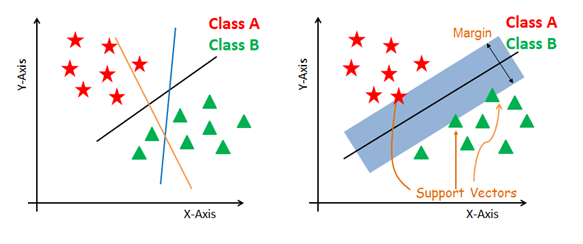

Doğrusal Ayırıcı

Doğrusal olmayan ve ayrılmaz düzlemlerle uğraşmak
Aşağıdaki şekilde gösterildiği gibi (sol taraf) bazı problemler doğrusal hiperdüzlem kullanılarak çözülemez.

Böyle bir durumda, SVM, giriş alanını sağda gösterildiği gibi daha yüksek boyutlu bir alana dönüştürmek için bir çekirdek hilesi kullanır. Veri noktaları, x ekseni ve z ekseni üzerinde çizilir (Z, hem x hem de y'nin karelerinin toplamıdır: z = x ^ 2 = y ^ 2). Artık bu noktaları doğrusal ayırma kullanarak kolayca ayırabilirsiniz.


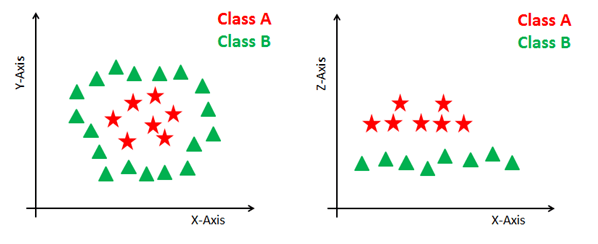

##SVM Algoritması

Gerekli Kütüphanelerin Eklenmesi

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

Verinin Oluşturulması ve Çizdirilmesi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


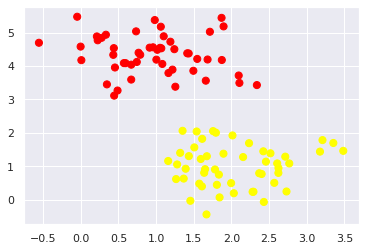

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Verimiz Gaussian şeklinde dağılmış 100 örnek içeriyor. (50-Kırmızı,50-Sarı)

Sınıflandırma için çizgilerin çizilmesi

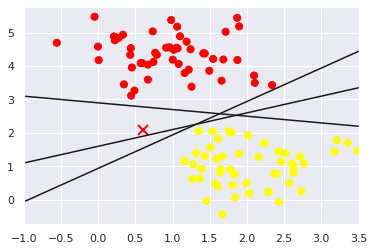

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.94), (0.5, 1.6), (-0.2,2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Her çizginin etrafına en yakın noktaya kadar bir genişlikte bir kenar boşluğu çizebiliriz 

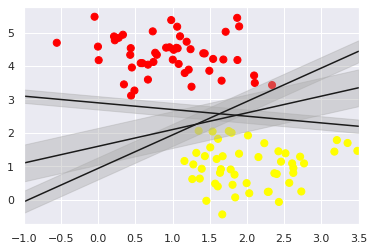

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.94, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Destek Vektör makinelerinin kullanımı fit edilmesi

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Burada yapılanları daha iyi görmek için görselleştirelim.

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

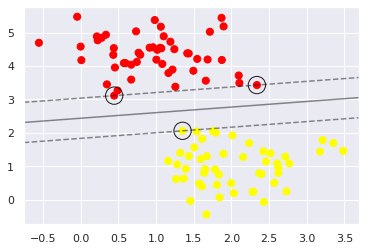

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Support Vectorler görüldüğü gibi siyah çember içerisinde.

Bu, iki nokta kümesi arasındaki marjı maksimize eden bölme çizgisidir. Eğitim noktalarından birkaçının kenar boşluğuna değdiğine dikkat edin, bunlar bu şekilde siyah dairelerle gösterilmiştir. Bu noktalar, bu uyumun en önemli unsurlarıdır ve destek vektörleri olarak bilinirler ve algoritmaya adını verirler.

Support Vectorlerin tam konumunu çıkarabiliriz

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

Algoritmamızın tahminlemesi için örnek noktamızı belirleyelim.

In [ ]:
x=[[2.5,1]]

In [ ]:
model.predict(x)

array([1])

sarı:1 kırmızı:0

#k En Yakın Komşular Algoritması (k-NN)

###k-NN Nedir?

KNN, hem parametrik olmayan hem de tembel öğrenme örneği olarak kabul edilen bir algoritmadır. Bu iki terim tam olarak ne anlama geliyor?
Parametrik olmayan, hiçbir varsayımda bulunmadığı anlamına gelir. Model, yapısının normal olduğunu varsaymak yerine, tamamen kendisine verilen verilerden oluşur.
Tembel öğrenme, algoritmanın genelleme yapmadığı anlamına gelir. Bu, bu yöntemi kullanırken çok az eğitimin olduğu anlamına gelir. Bu nedenle, KNN kullanılırken tüm eğitim verileri testlerde de kullanılır.

KNN nerede kullanılır?

KNN genellikle basit öneri sistemleri, görüntü tanıma teknolojisi ve karar verme modelleri. Netflix veya Amazon gibi şirketlerin izlenebilecek farklı filmler veya satın alınacak kitaplar önermek için kullandıkları algoritmadır. Netflix, en doğru öneri algoritmasını oluşturan ekibe 1 milyon dolar ödül veren Netflix Ödül yarışmasını bile başlattı!
“Fakat bu şirketler bunu nasıl yapıyor?” diye merak ediyor olabilirsiniz. Bu şirketler, izlediğiniz filmler veya satın aldığınız kitaplar hakkında kendi web sitelerinden topladıkları bir veri setine KNN uygulayacaklar. Bu şirketler daha sonra mevcut müşteri verilerinizi girecek ve bunları benzer filmler izlemiş veya benzer kitaplar satın almış diğer müşterilerle karşılaştıracaktır. Bu veri noktası daha sonra KNN kullanılarak geçmişlerine göre belirli bir profil olarak sınıflandırılacaktır. Önerilen filmler ve kitaplar, algoritmanın bu veri noktasını nasıl sınıflandırdığına bağlı olacaktır.

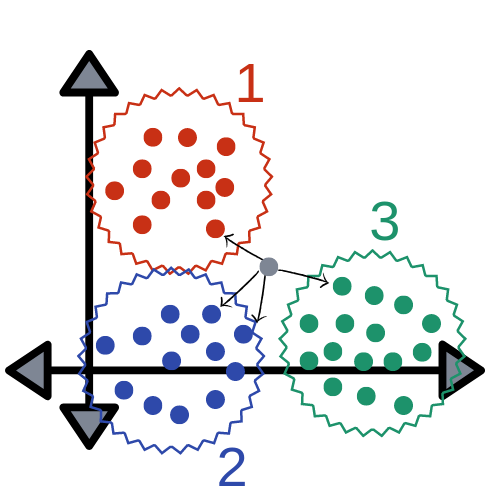

Yukarıdaki görüntü, belirli bir veri kümesine dayalı olarak bir veri noktasını sınıflandırmaya çalışırken KNN'nin nasıl çalıştığını görselleştirir. En yakın noktaları ile karşılaştırılır ve hangi noktalara en yakın ve en benzer olduğuna göre sınıflandırılır. Burada, Xj noktasının, her bir nokta grubuna olan uzaklığına bağlı olarak W1 (kırmızı) veya W3 (yeşil) olarak sınıflandırılacağını görebilirsiniz.

KNN'nin Arkasındaki Matematik

Hemen hemen her şey gibi KNN de kullandığı köklü matematik teorileri sayesinde çalışır. KNN'yi uygularken ilk adım, veri noktalarını özellik vektörlerine veya matematiksel değerlerine dönüştürmektir. Algoritma daha sonra bu noktaların matematiksel değerleri arasındaki mesafeyi bularak çalışır. Bu mesafeyi bulmanın en yaygın yolu, aşağıda gösterildiği gibi Öklid mesafesidir.

KNN, her bir veri noktası ile test verileri arasındaki mesafeyi hesaplamak için bu formülü çalıştırır. Daha sonra bu noktaların test verilerine benzer olma olasılığını bulur ve hangi noktaların en yüksek olasılıkları paylaştığına göre sınıflandırır.

##kNN Algoritması

Verimizi test ve eğitim olarak bölelim.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,)

In [ ]:
print("X:",X.shape,"X_train:",X_train.shape,"X_test:",X_test.shape,
      "y:",y.shape,"y_train",y_train.shape,"y_test",y_test.shape)

X: (100, 2) X_train: (80, 2) X_test: (20, 2) y: (100,) y_train (80,) y.shape (20,)


Knn için sklearn.neighbors kütüphane paketini ekleyelim.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

Bu model, gelecekteki bir veri noktasının değerini tahmin etmek için en yakın üç komşuyu kullanacaktır.

Modelimizi fit edelim.

In [11]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

SVM için kullandığımız örnek noktamızı k-NN için kullanalım.

In [ ]:
knn_model.predict(x)

array([1.])

sarı:1 kırmızı:0

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model1 = KNeighborsRegressor(n_neighbors=5)

Bu model, gelecekteki bir veri noktasının değerini tahmin etmek için en yakın beş komşuyu kullanacaktır.

In [ ]:
knn_model1.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Tahminleyelim

In [ ]:
knn_model1.predict(x)

array([1.])

sarı:1 kırmızı:0

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model2 = KNeighborsRegressor(n_neighbors=1)

Bu model, gelecekteki bir veri noktasının değerini tahmin etmek için en yakın bir komşuyu kullanacaktır.

Tahminleyelim

In [ ]:
knn_model2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [ ]:
knn_model2.predict(x)

array([1.])

sarı:1 kırmızı:0

Üç farklı k-NN değeri için algoritmamızı yeniden kurduk ve tahmin sonuçlarını karşılaştırdığımızda benzer sonuçlar elde ettik.

#Kaynakça

[SVM Nedir?](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

[SVM Algoritması](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[kNN Algoritması](https://realpython.com/knn-python/#fit-knn-in-python-using-scikit-learn)

[kNN Nedir?](https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26)